In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from pathlib import Path  


In [10]:
current_directory = Path().resolve()

data_directory = current_directory.parent / 'data'
file_path = data_directory / "iris.csv"
try:
    df = pd.read_csv(file_path)

except:
    print(f"File path : {file_path} doesn't exists")

In [11]:
print("columns in a dataset: \n", df.columns)
print("Info of a dataset:", df.info())

columns in a dataset: 
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Info of a dataset: None


In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
rename_columns = {'SepalLengthCm': 'sepal_length', 'SepalWidthCm': 'sepal_width', 'PetalLengthCm' : 'petal_length', 'PetalWidthCm' : 'petal_width'}
df.rename(columns= rename_columns, inplace= True)
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
final_df = df.drop('Species', axis = 1)

In [16]:
final_df

,Id,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [35]:
# Standardizing the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(final_df), columns=final_df.columns)


In [36]:
df_scaled

,Id,sepal_length,sepal_width,petal_length,petal_width
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956
146,1.651258,0.553333,-1.281972,0.705893,0.922064
147,1.674353,0.795669,-0.124958,0.819624,1.053537
148,1.697448,0.432165,0.800654,0.933356,1.447956


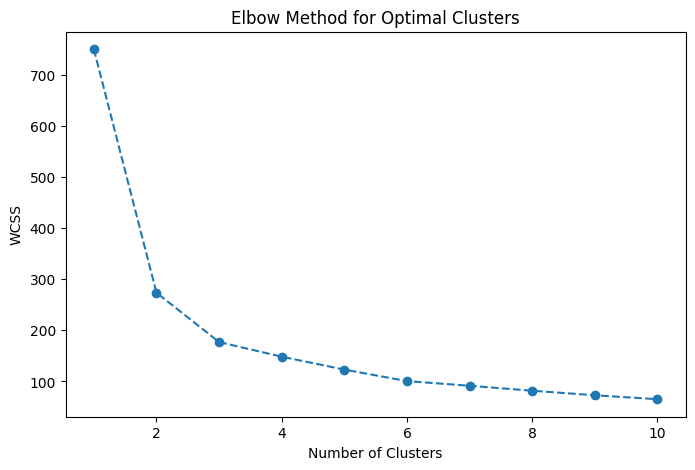

In [37]:
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia measures cluster compactness

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [39]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=42, n_init=10, max_iter= 500)
df_scaled['cluster_kmeans'] = kmeans.fit_predict(df_scaled)

# Compute Silhouette Score
sil_score = silhouette_score(df_scaled.drop(columns=['cluster_kmeans']), df_scaled['cluster_kmeans'])
print(f'Silhouette Score for K-Means: {sil_score:.2f}')


Silhouette Score for K-Means: 0.45


In [40]:
df_scaled

,Id,sepal_length,sepal_width,petal_length,petal_width,cluster_kmeans
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,2
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,2
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,2
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,2
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,2
...,...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956,1
146,1.651258,0.553333,-1.281972,0.705893,0.922064,1
147,1.674353,0.795669,-0.124958,0.819624,1.053537,1
148,1.697448,0.432165,0.800654,0.933356,1.447956,1


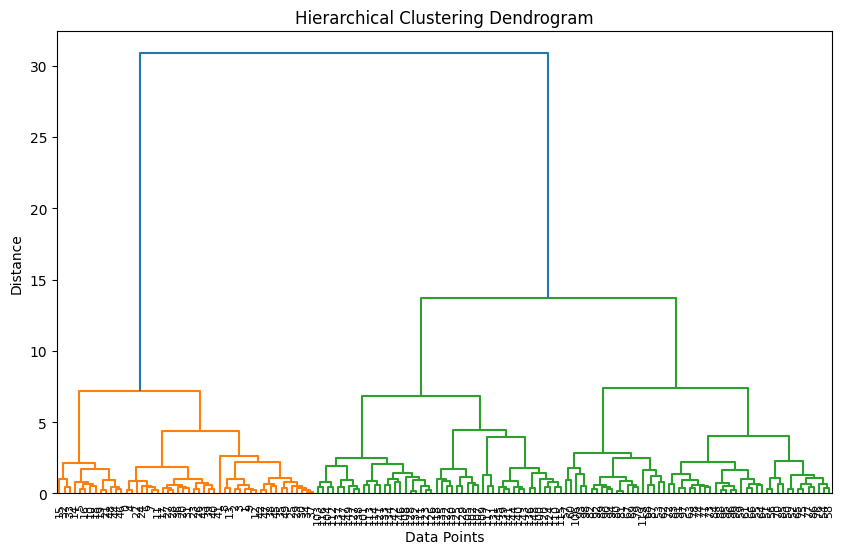

In [41]:
# Generate linkage matrix
linked = linkage(df_scaled.drop(columns=['cluster_kmeans']), method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [42]:
df_scaled

,Id,sepal_length,sepal_width,petal_length,petal_width,cluster_kmeans
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,2
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,2
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,2
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,2
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,2
...,...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956,1
146,1.651258,0.553333,-1.281972,0.705893,0.922064,1
147,1.674353,0.795669,-0.124958,0.819624,1.053537,1
148,1.697448,0.432165,0.800654,0.933356,1.447956,1


In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Tune parameters
df_scaled['cluster_dbscan'] = dbscan.fit_predict(df_scaled.drop(columns=['cluster_kmeans']))

sil_dbscan = silhouette_score(df_scaled.drop(columns=['cluster_kmeans','cluster_dbscan']), df_scaled['cluster_dbscan'])
print(f'Silhouette Score for DBSCAN: {sil_dbscan:.2f}')


Silhouette Score for DBSCAN: -0.17


In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode
from sklearn.metrics import confusion_matrix, accuracy_score

# Encode the Species column
le = LabelEncoder()
df['Species_Encoded'] = le.fit_transform(df['Species'])  # Convert species names to 0,1,2

# Extract encoded species labels
true_labels = df['Species_Encoded'].values  

# Extract K-Means cluster labels
cluster_labels = df_scaled['cluster_kmeans'].values  # Assuming clusters are stored in 'Cluster' column

# Map clusters to actual species labels
mapping = {}
for cluster in np.unique(cluster_labels):
    mask = cluster_labels == cluster  # Boolean mask
    if np.any(mask):  # Ensure there's at least one element in the cluster
        mode_label = mode(true_labels[mask], keepdims=True).mode  # Keepdims=True ensures an array
        mapping[cluster] = mode_label[0]  # Extract first element safely

# Convert cluster labels to predicted species labels
predicted_labels = np.array([mapping[cluster] for cluster in cluster_labels])

# Compute Confusion Matrix and Accuracy
conf_matrix = confusion_matrix(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

# Display results
print("Confusion Matrix:\n", conf_matrix)
print(f"Clustering Accuracy: {accuracy:.2f}")


Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]
Clustering Accuracy: 0.95
